# Simulated sparse transitions data

In [1]:
import ocelli as oci
import matplotlib as mpl
import scanpy as scp

mpl.rcParams['figure.dpi'] = 200

SEED = 17

## Load the data

In [2]:
adata = scp.read_h5ad('../../../data/sparse-transitions-dataset.h5ad')
adata

AnnData object with n_obs × n_vars = 4500 × 1
    obs: 'celltype', 'pseudotime'
    uns: 'modalities'
    obsm: 'modality0', 'modality1'

(<Figure size 1280x960 with 2 Axes>, <AxesSubplot:>)

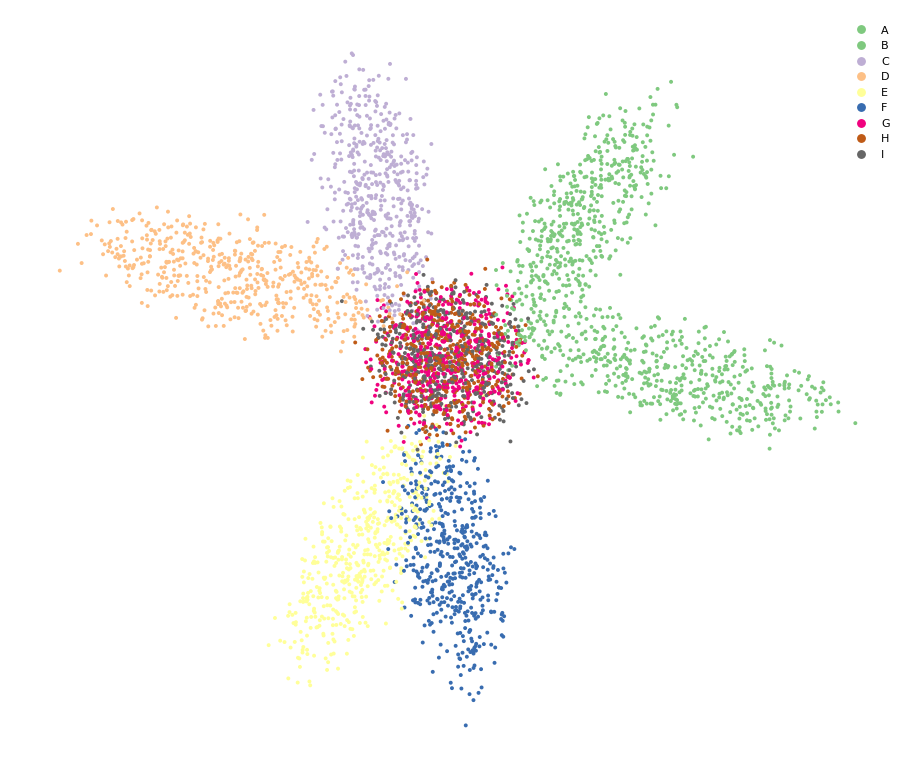

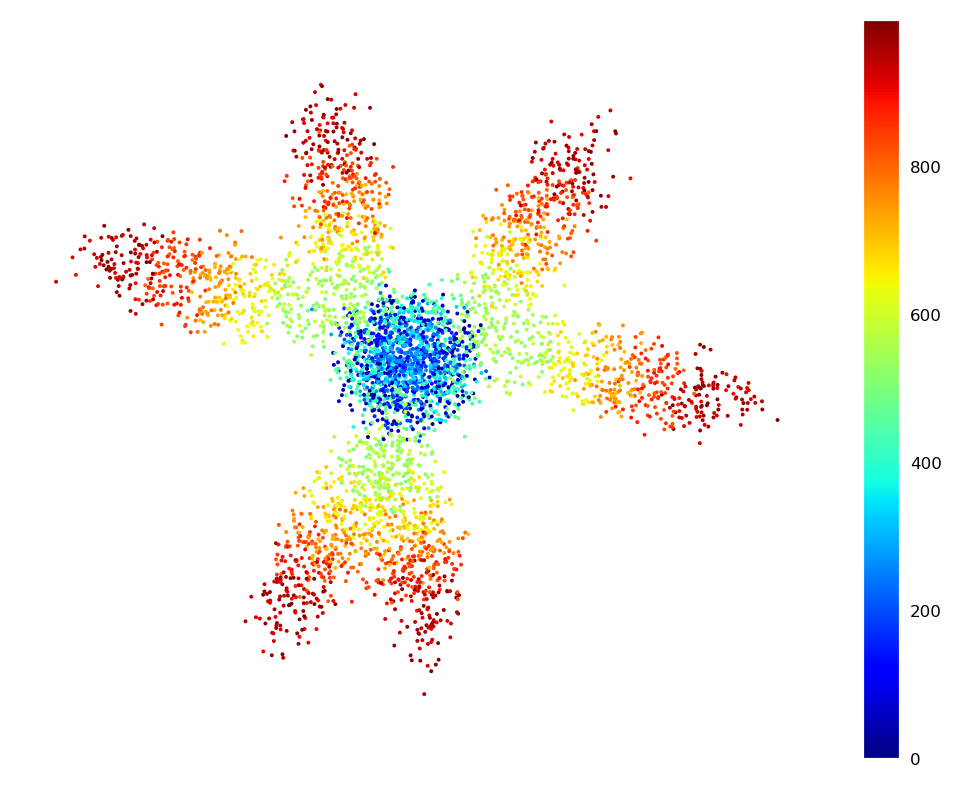

In [3]:
oci.tl.project_2d(adata, x3d_key='modality0', output_key='modality0_proj', alpha=-45, beta=120)
oci.pl.scatter(adata, x_key='modality0_proj', color_key='celltype', marker_size=2, cmap='Accent')
oci.pl.scatter(adata, x_key='modality0_proj', color_key='pseudotime', marker_size=2, cmap='jet')

(<Figure size 1280x960 with 2 Axes>, <AxesSubplot:>)

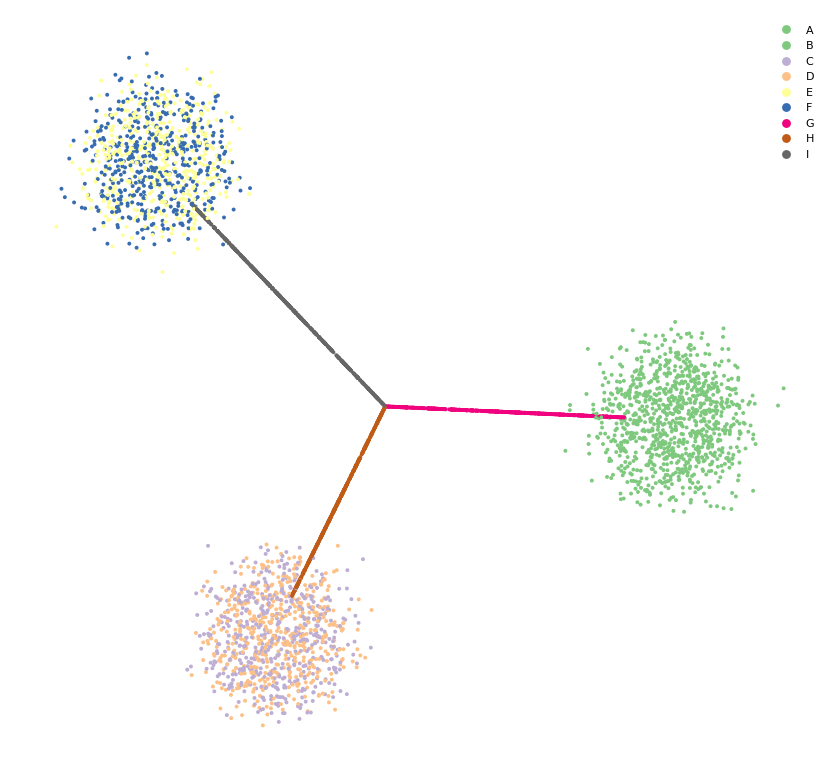

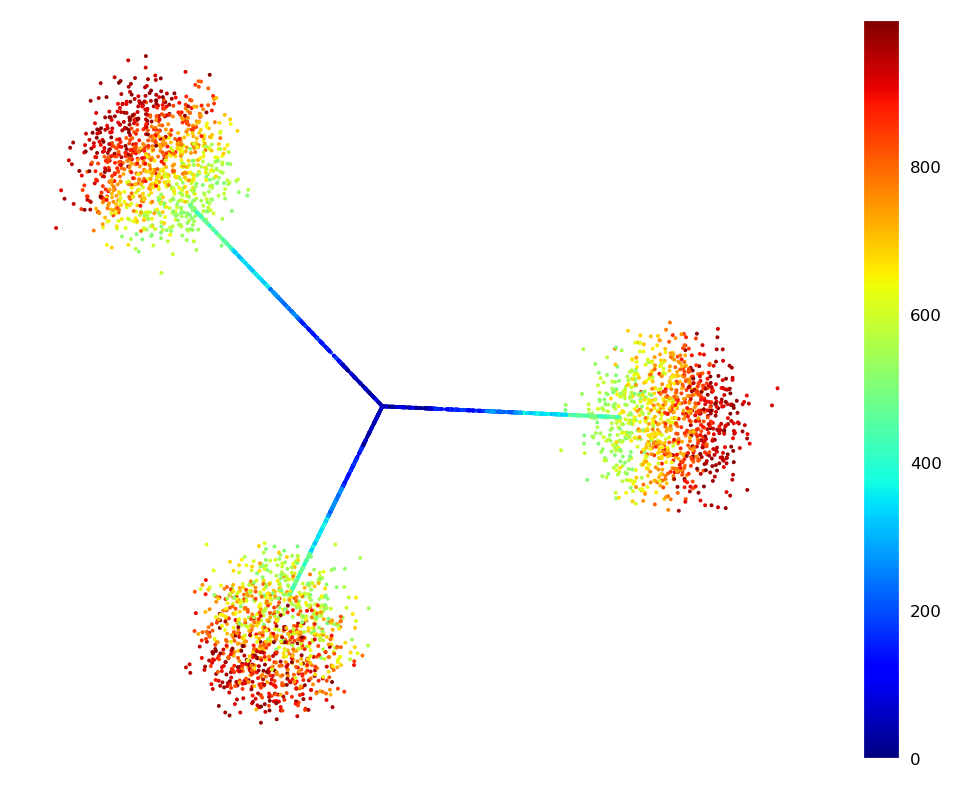

In [4]:
oci.tl.project_2d(adata, x3d_key='modality1', output_key='modality1_proj', alpha=-45, beta=60)
oci.pl.scatter(adata, x_key='modality1_proj', color_key='celltype', marker_size=2, cmap='Accent')
oci.pl.scatter(adata, x_key='modality1_proj', color_key='pseudotime', marker_size=2, cmap='jet')

## Calculate Multimodal Diffusion Maps components

In [5]:
oci.pp.neighbors(adata, n_neighbors=60, verbose=True)
oci.tl.weights(adata, random_state=SEED, verbose=True)

[modality0] 60 nearest neighbors calculated.
[modality1] 60 nearest neighbors calculated.


2022-10-04 19:29:53,087	INFO worker.py:1518 -- Started a local Ray instance.


Multimodal cell-specific weights estimated.


(<Figure size 2160x320 with 18 Axes>,
 array([[<AxesSubplot:title={'center':'A'}, ylabel='modality0'>,
         <AxesSubplot:title={'center':'B'}>,
         <AxesSubplot:title={'center':'C'}>,
         <AxesSubplot:title={'center':'D'}>,
         <AxesSubplot:title={'center':'E'}>,
         <AxesSubplot:title={'center':'F'}>,
         <AxesSubplot:title={'center':'G'}>,
         <AxesSubplot:title={'center':'H'}>,
         <AxesSubplot:title={'center':'I'}>],
        [<AxesSubplot:ylabel='modality1'>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>]], dtype=object))

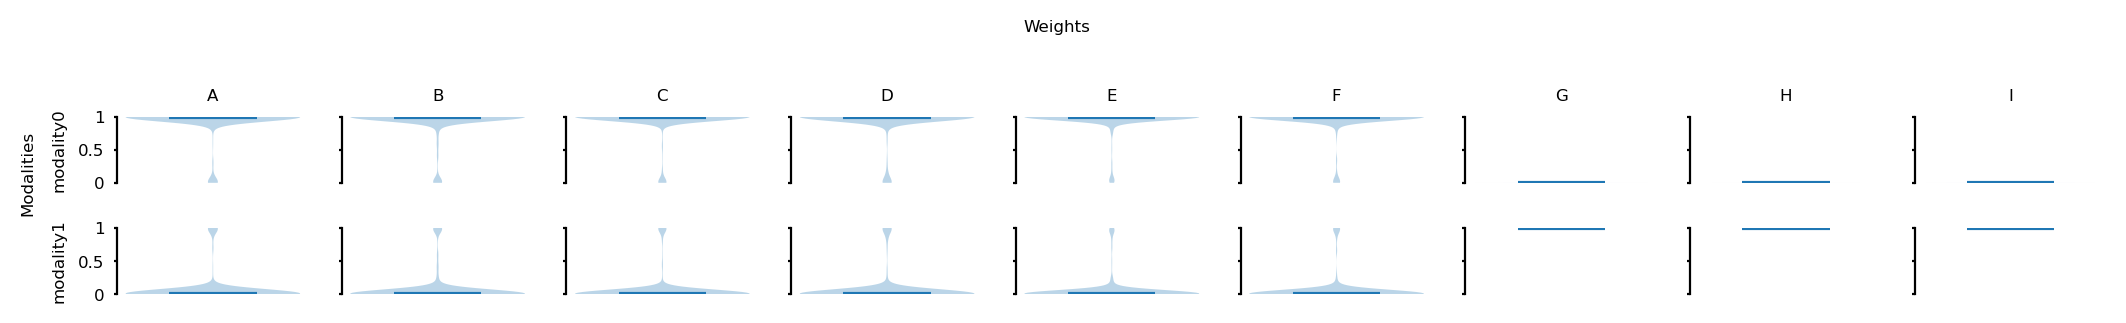

In [6]:
oci.pl.weights(adata, grouping_key='celltype')

In [7]:
oci.tl.MDM(adata, n_components=20, unimodal_norm=False, verbose=True, random_state=SEED)
adata

2022-10-04 19:30:00,772	INFO worker.py:1518 -- Started a local Ray instance.


[modality0] Unimodal Markov chain calculated
[modality1] Unimodal Markov chain calculated
Multimodal Markov chain calculated
Eigendecomposition finished.
20 Multimodal Diffusion Maps components calculated.


AnnData object with n_obs × n_vars = 4500 × 1
    obs: 'celltype', 'pseudotime'
    uns: 'modalities'
    obsm: 'modality0', 'modality1', 'modality0_proj', 'modality1_proj', 'neighbors_modality0', 'distances_modality0', 'neighbors_modality1', 'distances_modality1', 'weights', 'X_mdm'

## Visualize the data

In [8]:
oci.pp.neighbors(adata, modalities=['X_mdm'], n_neighbors=75, verbose=True)
oci.tl.nn_graph(adata, n_edges=75, neighbors_key='X_mdm', verbose=True)
adata

[X_mdm] 75 nearest neighbors calculated.
[X_mdm] Nearest neighbors-based graph constructed.


AnnData object with n_obs × n_vars = 4500 × 1
    obs: 'celltype', 'pseudotime'
    uns: 'modalities'
    obsm: 'modality0', 'modality1', 'modality0_proj', 'modality1_proj', 'neighbors_modality0', 'distances_modality0', 'neighbors_modality1', 'distances_modality1', 'weights', 'X_mdm', 'neighbors_X_mdm', 'distances_X_mdm', 'graph'

In [9]:
oci.tl.FA2(adata, n_components=2, n_iter=5000, random_state=SEED, output_key='X_fa2')
adata

Oct 04, 2022 7:30:18 PM org.netbeans.modules.masterfs.watcher.Watcher getNotifierForPlatform
INFO: Native file watcher is disabled
Oct 04, 2022 7:30:19 PM org.gephi.io.processor.plugin.DefaultProcessor process
INFO: # Nodes loaded: 4,500 (4,500 added)
Oct 04, 2022 7:30:19 PM org.gephi.io.processor.plugin.DefaultProcessor process
INFO: # Edges loaded: 337,500 (190,540 added)


*************************25%
*************************50%
*************************75%
***************

**********100%
Time = 33.291s


AnnData object with n_obs × n_vars = 4500 × 1
    obs: 'celltype', 'pseudotime'
    uns: 'modalities'
    obsm: 'modality0', 'modality1', 'modality0_proj', 'modality1_proj', 'neighbors_modality0', 'distances_modality0', 'neighbors_modality1', 'distances_modality1', 'weights', 'X_mdm', 'neighbors_X_mdm', 'distances_X_mdm', 'graph', 'X_fa2'

(<Figure size 1280x960 with 1 Axes>, <AxesSubplot:>)

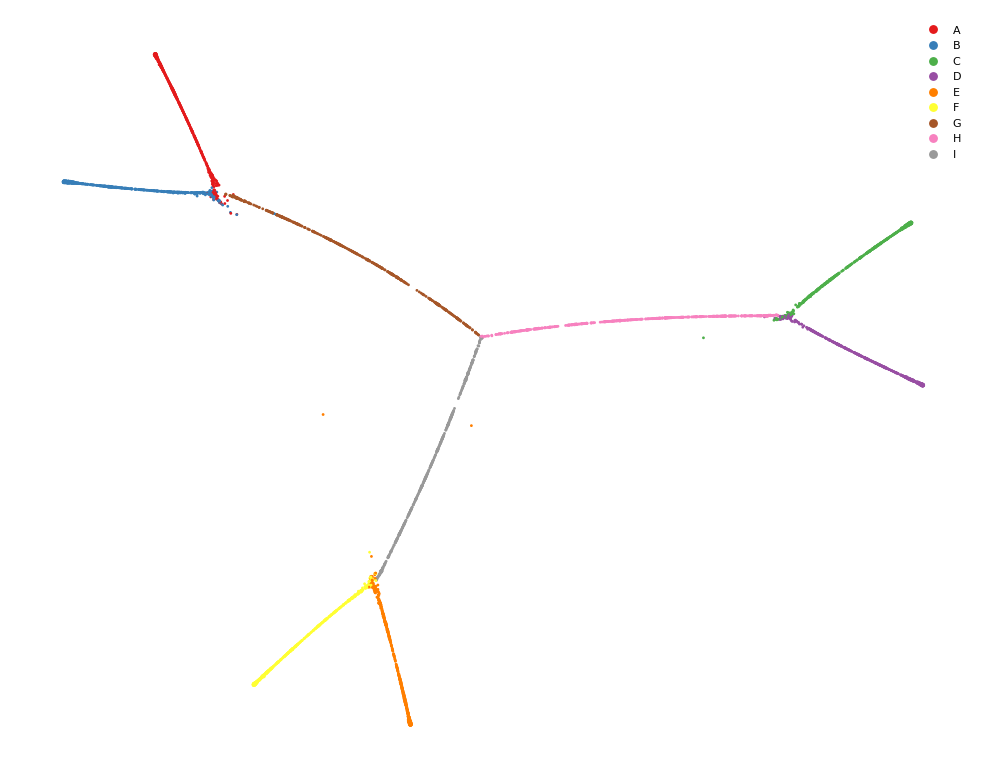

In [10]:
oci.pl.scatter(adata, x_key='X_fa2', color_key='celltype', cmap='Set1', marker_size=1)

(<Figure size 1280x960 with 2 Axes>, <AxesSubplot:>)

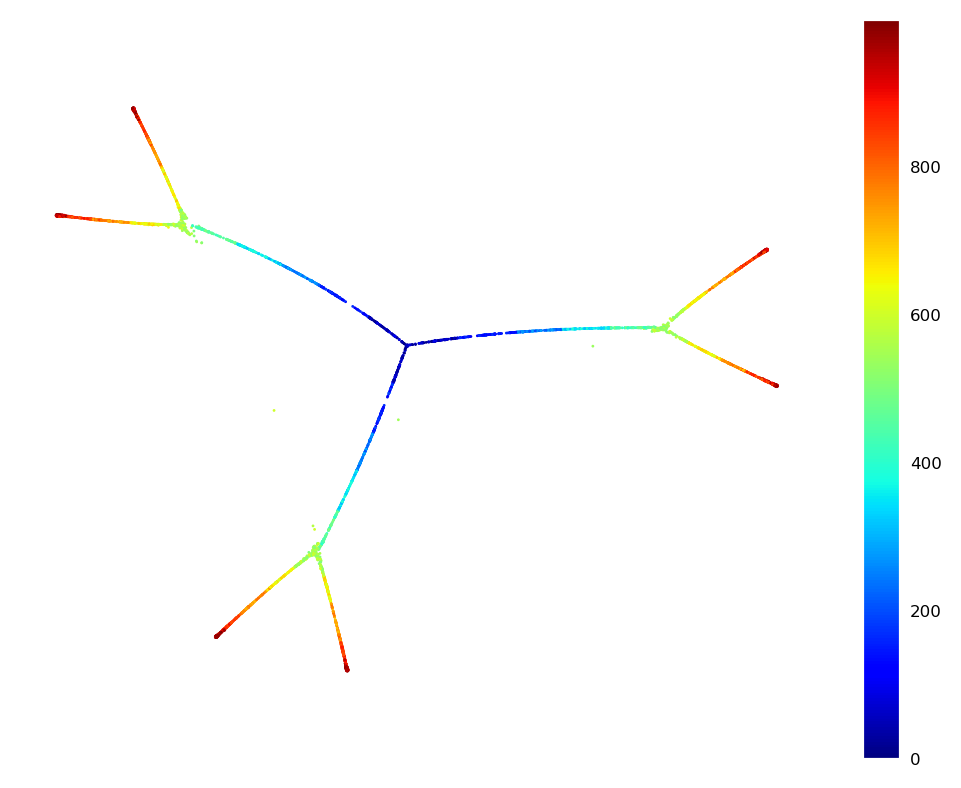

In [11]:
oci.pl.scatter(adata, x_key='X_fa2', color_key='pseudotime', cmap='jet', marker_size=1)

(<Figure size 1280x960 with 2 Axes>, <AxesSubplot:>)

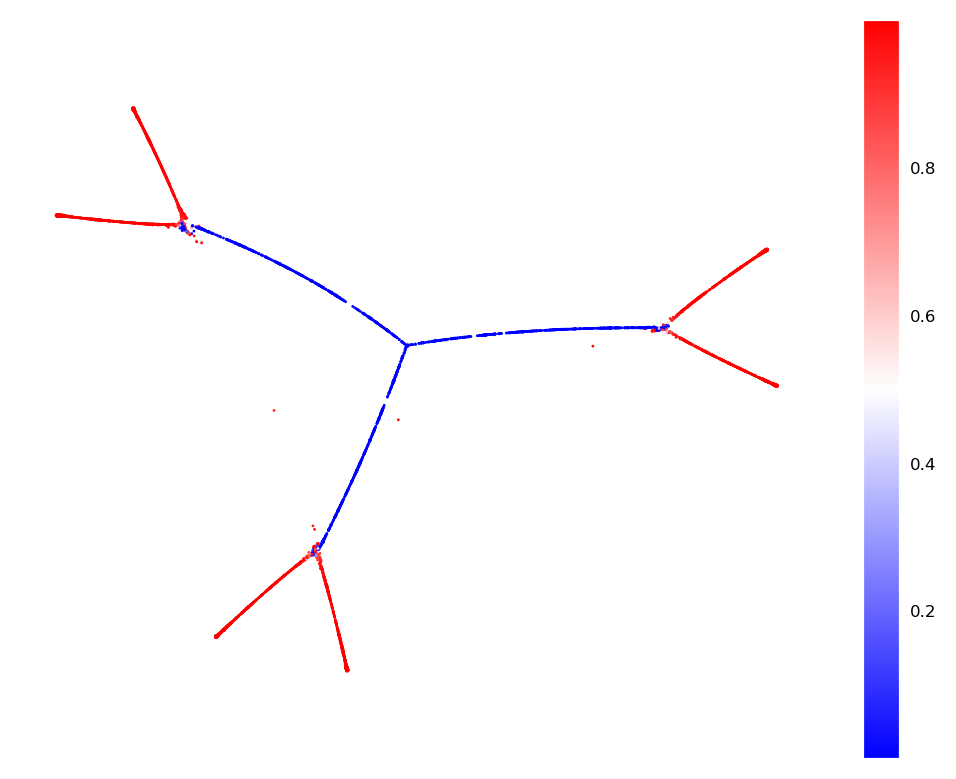

In [12]:
adata.obs['w_m0'] = list(adata.obsm['weights']['modality0'])
oci.pl.scatter(adata, x_key='X_fa2', color_key='w_m0', cmap='bwr', marker_size=1)

(<Figure size 1280x960 with 2 Axes>, <AxesSubplot:>)

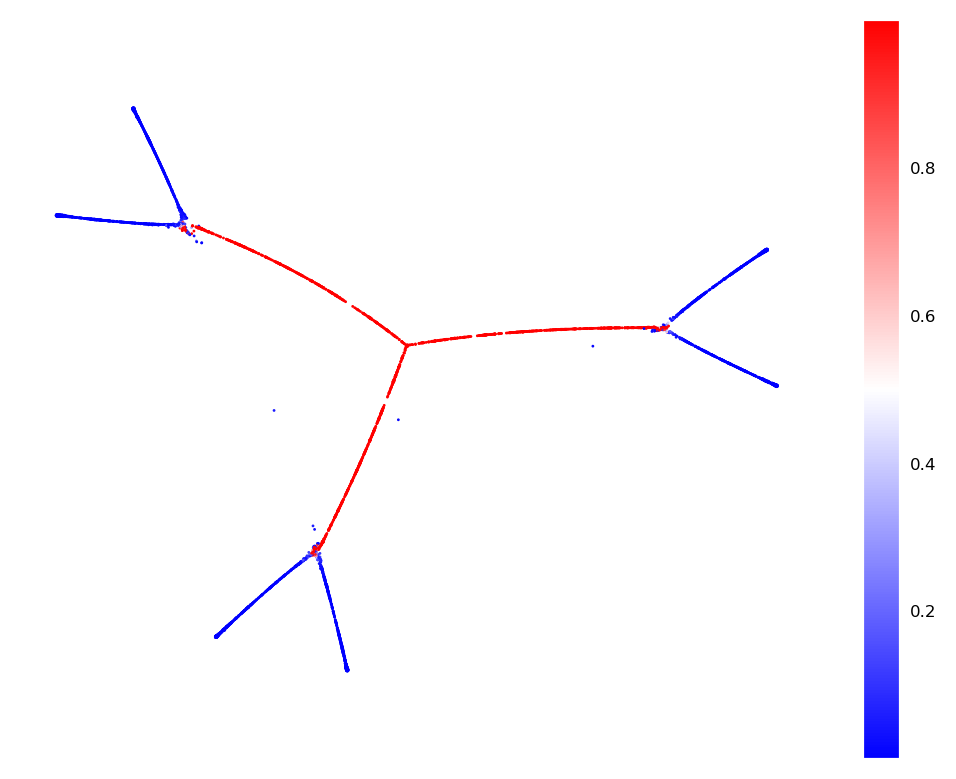

In [13]:
adata.obs['w_m1'] = list(adata.obsm['weights']['modality1'])
oci.pl.scatter(adata, x_key='X_fa2', color_key='w_m1', cmap='bwr', marker_size=1)